# AWS Rekognition Text Detection Test

In [10]:
import boto3
s3_resource = boto3.resource('s3')
client=boto3.client('rekognition')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE 1

In [60]:
bucket='secondpythonbucket6ce9cccf-c429-471c-99a1-f36e849ee381'
photo='00007-4883-13_DB18ED97.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if text['Id'] < 7:
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:12-
Confidence: 93.96%


Detected text:11
Confidence: 91.60%


Detected text:GS
Confidence: 98.74%


Detected text:10
Confidence: 92.72%


Detected text:9
Confidence: 91.42%


Detected text:8
Confidence: 93.61%


Detected text:6
Confidence: 90.53%




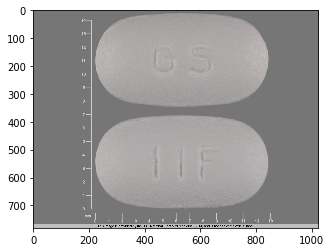

In [61]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/00007-4883-13_DB18ED97.jpg')
plt.imshow(pill_img);

IMAGE 2

In [62]:
photo='009045988.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    #if text['Id'] < 7:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:225
Confidence: 99.75%


Detected text:225
Confidence: 99.75%




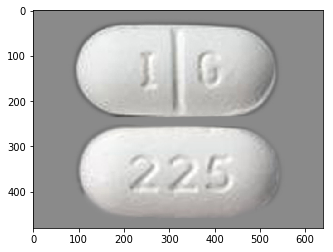

In [63]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/009045988.jpg')
plt.imshow(pill_img);

IMAGE 3

In [64]:
photo='006035484.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:54 84
Confidence: 98.81%


Detected text:V
Confidence: 95.97%


Detected text:V
Confidence: 95.97%


Detected text:54
Confidence: 99.12%


Detected text:84
Confidence: 98.50%




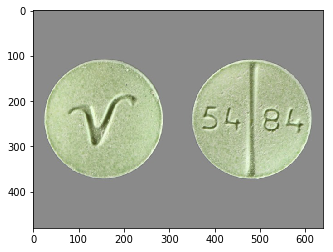

In [65]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/006035484.jpg')
plt.imshow(pill_img);

IMAGE 4

In [66]:
photo='007773107.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:DISTA PROZAC
Confidence: 99.98%


Detected text:40 mg mg
Confidence: 90.95%


Detected text:3107
Confidence: 99.97%


Detected text:PROZAC
Confidence: 99.98%


Detected text:DISTA
Confidence: 99.98%


Detected text:40 mg
Confidence: 91.80%


Detected text:mg
Confidence: 90.11%




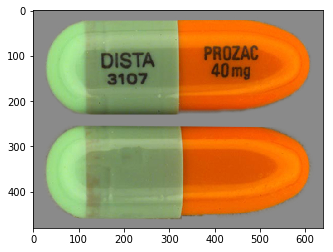

In [67]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/007773107.jpg')
plt.imshow(pill_img);

### Let's try to manipulate an image from S3 Bucket

We'll try to cut the image in half to split into 2 images 
(To mimic a scenario where a user will send pictures of front and back of pill)

Then we'll seek to read text from each and keep unique pieces of text (but only those with "Confidence" > 85%)

IMAGE 5

In [13]:
photo='007811655.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:PVK 500
Confidence: 99.73%


Detected text:66 950
Confidence: 95.93%


Detected text:PVK
Confidence: 99.68%


Detected text:500
Confidence: 99.79%


Detected text:66
Confidence: 93.53%


Detected text:950
Confidence: 98.32%




### How to get url of file uploaded on AWS S3 bucket?

https://stackoverflow.com/questions/29555954/how-to-get-url-of-file-uploaded-on-aws-s3-bucket

This is a security error. There is a good chance that you are using the good URL, but you don't have the right to access the file. You need to change the permissions to download: Everyone. Then the file will be accessible via the internet for anyone. If you don't want to do this, then you can set up different permissions like: Authenticated users, **then you are able to access the file from an EC2 instance with the right IAM User attached.**

In [ ]:
# THIS IS NOT WORKING! HOW CAN I GET THE URL FOR AN IMAGE???
from urllib.request import urlopen
myurl = "https://secondpythonbucket6ce9cccf-c429-41c-99a1-f36e849ee381.s3.amazonaws.com/007811655.jpg"
myfile = urlopen(myurl)
myfile

### Getting Image from S3 and Splitting into 2 Images

In [15]:
# Downloading image
s3_resource = boto3.resource('s3')

s3_resource.Object(bucket, photo).download_file(f'./{photo}')

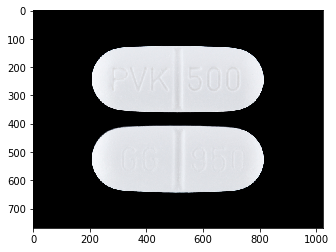

In [16]:
import imageio
import matplotlib.pyplot as plt

pic = imageio.imread('./007811655.jpg')
plt.imshow(pic);

In [18]:
pic.shape

(768, 1024, 3)

In [28]:
height, width = pic.shape[:2]

# Cut the image in half
height_cutoff = height // 2
s1 = pic[:height_cutoff,:]
s2 = pic[height_cutoff:,:]

# Save each half
imageio.imwrite('img1.png', s1)
imageio.imwrite('img2.png', s2)

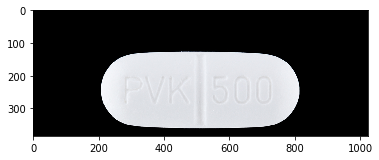

In [29]:
pic1 = imageio.imread('./img1.png')
plt.imshow(pic1);

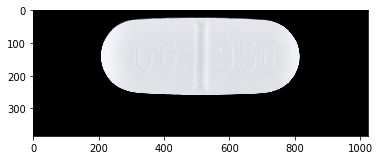

In [30]:
pic2 = imageio.imread('./img2.png')
plt.imshow(pic2);

In [36]:
photo='597620119.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:PD
Confidence: 97.26%


Detected text:270
Confidence: 99.66%


Detected text:PD
Confidence: 97.26%


Detected text:270
Confidence: 99.66%




In [40]:
for each in textDetections

{'DetectedText': 'PD',
 'Type': 'LINE',
 'Id': 0,
 'Confidence': 97.25602722167969,
 'Geometry': {'BoundingBox': {'Width': 0.24218976497650146,
   'Height': 0.15416590869426727,
   'Left': 0.12943238019943237,
   'Top': 0.3020840883255005},
  'Polygon': [{'X': 0.12943238019943237, 'Y': 0.3020840883255005},
   {'X': 0.37162214517593384, 'Y': 0.3013715445995331},
   {'X': 0.3718772828578949, 'Y': 0.45553746819496155},
   {'X': 0.12968750298023224, 'Y': 0.45625001192092896}]}}

In [47]:
import pandas as pd
df_txt  = pd.DataFrame(textDetections)
df_txt = df_txt.drop(['Geometry', 'Id', 'ParentId', 'Type'], axis=1)
df_txt

,Confidence,DetectedText
0,97.256027,PD
1,99.658211,270
2,97.256027,PD
3,99.658211,270


In [50]:
df1 = df_txt.groupby('DetectedText').count()
df1

,Confidence
DetectedText,
270,2
PD,2


### Code to Get Unique Text Sets for Rekognition Dectection

In [54]:
text_found = []
for text in textDetections:
    text_found.append(text['DetectedText'])
text_set = list(set(text_found))
text_set

['270', 'PD']

In [53]:
text_found

['PD', '270', 'PD', '270']

## Testing Rekognition with 1-Sided Test Images

### Uploading Cropped Text Images

- Took images from PillBox and divided them to have 1 image for each side

- Uploaded images into an S3 bucket

In [57]:
import os

img_bucket_name = 'firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

path = './test_images'
# counting files uploaded
n_count = 0 

for filename in os.listdir(path):
    s3_resource.Object(img_bucket_name, 
                       filename).upload_file(
                       Filename=f'./test_images/{filename}')
    n_count += 1

print(f'Number of files uploaded: {n_count}')

Number of files uploaded: 14


### Reading Text from Test Images

To be read in pairs (Side A & Side B)

#### First Image Test

In [69]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img7a.JPG', 'img7b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    
    for text in textDetections:
        text_found.append(text['DetectedText'])
    
    text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_set)

In [70]:
all_text

[['5/500'], ['5712']]

#### Second Image Test (Now as a function)

In [74]:
# Text  Dectection Function
def text_detection(filename_list):
    
    #THIS IS A TEST BUCKET
    bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

    # Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
    # Will contain a list per side (2 lists)
    all_text = []

    # Looping through each image in "photo_sides" list
    for file in filename_list:
        # Detecting Text from Specified Image in S3 Bucket
        response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':file}})

        # Detected Text (List of Dictionaries)
        textDetections=response['TextDetections']

        # Parsing Through Detected Text and 
        # Making list of Unique Sets of Text Dectected
        text_found = []

        for text in textDetections:
            text_found.append(text['DetectedText'])

        text_set = list(set(text_found))
        
        # Appending detected text in image to "all_text" list
        all_text.append(text_set)
        
    return all_text

It only reads one digit! ('9')

In [75]:
# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img3a.JPG', 'img3b.JPG']

text_detection(photo_sides)

[[], ['9']]

For 'img3a.JPG' it does not detect anything

In [79]:
photo='img3a.JPG'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected text


Will turning the Object from S3 into grayscale help?

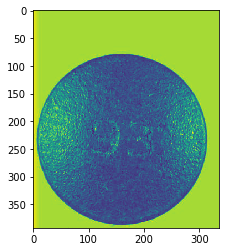

In [93]:
from skimage.exposure import rescale_intensity
from skimage import color
obj_key = 'img3a.JPG'
obj = s3_resource.Object(bucket, obj_key)
obj_body = obj.get()['Body'].read()

photo = imageio.imread(obj_body)
bw_photo = rescale_intensity(color.rgb2gray(photo))

plt.imshow(bw_photo);

In [105]:
import base64

obj_key = 'img3a.JPG'
obj = s3_resource.Object(bucket, obj_key)
obj_body = obj.get()['Body'].read()

photo = imageio.imread(obj_body)
bw_photo = rescale_intensity(color.rgb2gray(photo))

# base64 encoding
# photo_base64 = base64.b64encode(photo)
# photo_base64

with open(photo, 'rb') as image:
    response=client.detect_text(Image={'Bytes': image.read()})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

C:\Users\Gutierrez\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: path should be string, bytes, or os.PathLike, not Array
  


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 0: invalid start byte